## Getting the data

http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html

#### Cleaning the Data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import csv
from collections import defaultdict

In [2]:
disease_list = []

In [3]:
# cleaning the Data
def return_list(disease):
    disease_list = []
    match = disease.replace('^', '_').split('_')
    counter = 1
    for group in match:
        if counter%2 == 0:
            disease_list.append(group)
        counter += 1
    return disease_list

Getting each row of our data table
formatting the columns
Getting the list of symptoms for each disease

In [4]:
with open("Scraped-Data/dataset_uncleaned.csv") as csvfile:
    f_reader = csv.reader(csvfile)
    disease = ""
    weightn = 0
    disease_list = []
    dict_wt = {}
    dict_ = defaultdict(list)
    

    for row in f_reader:
        if row[0]!="\xc2\xa0" and row[0]!="":
            disease = row[0]
            disease_list = return_list(disease)
            weight = row[1]
        
        if row[2]!="\xc2\xa0" and row[2]!="":
            symptom_list = return_list(row[2])
        
            for disease in disease_list:
                for symptom in symptom_list:
                    dict_[disease].append(symptom)
                dict_wt[disease] = weight
                  
        
#     print(dict_)
        

Saving the cleaned data

In [5]:
with open("Scraped-Data/dataset_clean.csv", "w") as csvfile:
    f_writer = csv.writer(csvfile)
    for key, values in dict_.items():
        for v in values:
            key = str.encode(key).decode('utf-8')
            f_writer.writerow([key,v,dict_wt[key]])

In [6]:
columns = ['Source', 'Target', 'Weight']
data = pd.read_csv("Scraped-Data/dataset_clean.csv", names=columns, encoding ="ISO-8859-1")


In [7]:
data.head()

,Source,Target,Weight
0,hypertensive disease,pain chest,3363
1,hypertensive disease,shortness of breath,3363
2,hypertensive disease,dizziness,3363
3,hypertensive disease,asthenia,3363
4,hypertensive disease,fall,3363


In [8]:
data.to_csv("Scraped-Data/dataset_clean.csv", index=False)

In [9]:
slist = []
dlist = []

with open("Scraped-Data/labeled_data.csv", "w") as csvfile:
    f_writer = csv.writer(csvfile)
    
    for key, values in dict_.items():
        for v in values:
            if v not in slist:
                f_writer.writerow([v,v,"symptom"])
                slist.append(v)
            if key not in dlist:
                f_writer.writerow([key,key,"disease"])
                dlist.append(key)
                

labeled_cols = ['Id', 'Label', 'Attribute']
labeled_data = pd.read_csv("Scraped-Data/labeled_data.csv", names=labeled_cols, encoding ="ISO-8859-1")
labeled_data.to_csv("Scraped-Data/labeled_data.csv", index=False)

In [10]:
labeled_data.head()

,Id,Label,Attribute
0,pain chest,pain chest,symptom
1,hypertensive disease,hypertensive disease,disease
2,shortness of breath,shortness of breath,symptom
3,dizziness,dizziness,symptom
4,asthenia,asthenia,symptom


# Analysing the cleaned data

In [11]:
data = pd.read_csv("Scraped-Data/dataset_clean.csv", encoding="ISO-8859-1")


In [12]:
data.to_csv("Scraped-Data/dataset_clean.csv", index=False)

print(len(data['Source'].unique()))
print(len(data['Target'].unique()))

149
405


Convert categorical variable into dummy/indicator variables.(Feature Engineering)

In [13]:
df = pd.DataFrame(data)
df_1 = pd.get_dummies(df.Target)

In [14]:
df_1.head()

,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,abscess bacterial,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_s = df['Source']

In [16]:
df_s.head()

0    hypertensive disease
1    hypertensive disease
2    hypertensive disease
3    hypertensive disease
4    hypertensive disease
Name: Source, dtype: object

In [17]:
df_pivoted = pd.concat([df_s, df_1], axis=1)
print(len(df_pivoted))
df_pivoted.drop_duplicates(keep='first', inplace=True)

2129


In [18]:
df_pivoted[:6]

,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
print(len(df_pivoted))

2116


In [20]:
cols = df_pivoted.columns

In [21]:
cols[1:]

Index(['Heberden's node', 'Murphy's sign', 'Stahli's line', 'abdomen acute',
       'abdominal bloating', 'abdominal tenderness', 'abnormal sensation',
       'abnormally hard consistency', 'abortion', 'abscess bacterial',
       ...
       'vision blurred', 'vomiting', 'weepiness', 'weight gain', 'welt',
       'wheelchair bound', 'wheezing', 'withdraw', 'worry', 'yellow sputum'],
      dtype='object', length=404)

In [22]:
cols = cols[1:]

In [23]:
df_pivoted = df_pivoted.groupby('Source').sum()
df_pivoted = df_pivoted.reset_index()
df_pivoted[:5]

,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,HIV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PneumocystisÂ cariniiÂ pneumonia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,accidentÂ cerebrovascular,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,acquiredÂ immuno-deficiency syndrome,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
len(df_pivoted)

149

In [25]:
df_pivoted.to_csv("Scraped-Data/df_pivoted.csv")

Defining input and target data

In [26]:
X = df_pivoted[cols]
y = df_pivoted['Source']

### Building the models
#### trying out our classifiers to learn diseases from symptoms

In [27]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [28]:
test_size = 0.33
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

MultinomialNB

In [29]:
model = MultinomialNB()
model = model.fit(X_train, y_train)

checking the model

In [30]:
predictions_train = model.predict(X_train)
print("MultinomialNB train score: ", accuracy_score(y_train, predictions_train))

MultinomialNB train score:  0.9292929292929293


Evaluating the model

In [31]:
predictions_test = model.predict(X_test)  
print("MultinomialNB test score:", accuracy_score(y_test, predictions_test))

MultinomialNB test score: 0.0


 Using Desicion tree

In [32]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
predictions_train_dt = model_dt.predict(X_train)
print("DecisionTree train score:", accuracy_score(y_train, predictions_train_dt)) 

DecisionTree train score: 0.9292929292929293


In [34]:
predictions_test_dt = model_dt.predict(X_test)
print("DecisionTree test score:", accuracy_score(y_test, predictions_test_dt)) 


DecisionTree test score: 0.0


 Inferences on train and test split
 It can't work on unseen data because it has never seen that disease before. Also, there is only one point for each disease and hence no point for this. So we need to train the model entirely. Then what will we test it on? Missing data? Say given one symptom what is the disease? This is again multilabel classification. We can work symptom on symptom. What exactly is differential diagnosis, we need to replicate that.


For MNB

In [35]:
model_tot = MultinomialNB()
model_tot = model_tot.fit(X, y)

In [36]:
print("tot_MB_prediction score:", model_tot.score(X, y))

tot_MB_prediction score: 0.8993288590604027


for Decision tree model 

In [37]:
dt_model = DecisionTreeClassifier()
model_tot_dt = dt_model.fit(X, y)

In [38]:
print("tot_DT_prediction score:", model_tot_dt.score(X, y))  


tot_DT_prediction score: 0.8993288590604027


For MultinobialNB

In [39]:
disease_pred = model_tot.predict(X)
disease_real = y.values
length = (len(disease_real))

In [40]:
len(X.columns)

404

In [41]:
x_cols = X.columns

to show predications which the current model misclassifies

In [42]:
for i in range(0, length):
    if disease_pred[i]!=disease_real[i]:
        print(f'Pred: {disease_pred[i]}  ACTUAL: {disease_real[i]}')
       

Pred: HIV  ACTUAL: acquiredÂ immuno-deficiency syndrome
Pred: biliary calculus  ACTUAL: cholelithiasis
Pred: coronary arteriosclerosis  ACTUAL: coronary heart disease
Pred: depression mental  ACTUAL: depressive disorder
Pred: HIV  ACTUAL: hiv infections
Pred: carcinoma breast  ACTUAL: malignant neoplasm of breast
Pred: carcinoma of lung  ACTUAL: malignant neoplasm of lung
Pred: carcinoma prostate  ACTUAL: malignant neoplasm of prostate
Pred: carcinoma colon  ACTUAL: malignant tumor of colon
Pred: candidiasis  ACTUAL: oralcandidiasis
Pred: effusion pericardial  ACTUAL: pericardial effusion body substance
Pred: malignant neoplasms  ACTUAL: primary malignant neoplasm
Pred: sepsis (invertebrate)  ACTUAL: septicemia
Pred: sepsis (invertebrate)  ACTUAL: systemic infection
Pred: tonic-clonic epilepsy  ACTUAL: tonic-clonic seizures


for DT

In [43]:
disease_pred_dt = model_tot_dt.predict(X)
for i in range(0, length):
    if disease_pred_dt[i] != disease_real[i]: 
        print(f'Pred_dt: {disease_pred_dt[i]}   ACTUAL_dt: {disease_real[i]}')

Pred_dt: HIV   ACTUAL_dt: acquiredÂ immuno-deficiency syndrome
Pred_dt: biliary calculus   ACTUAL_dt: cholelithiasis
Pred_dt: coronary arteriosclerosis   ACTUAL_dt: coronary heart disease
Pred_dt: depression mental   ACTUAL_dt: depressive disorder
Pred_dt: HIV   ACTUAL_dt: hiv infections
Pred_dt: carcinoma breast   ACTUAL_dt: malignant neoplasm of breast
Pred_dt: carcinoma of lung   ACTUAL_dt: malignant neoplasm of lung
Pred_dt: carcinoma prostate   ACTUAL_dt: malignant neoplasm of prostate
Pred_dt: carcinoma colon   ACTUAL_dt: malignant tumor of colon
Pred_dt: candidiasis   ACTUAL_dt: oralcandidiasis
Pred_dt: effusion pericardial   ACTUAL_dt: pericardial effusion body substance
Pred_dt: malignant neoplasms   ACTUAL_dt: primary malignant neoplasm
Pred_dt: sepsis (invertebrate)   ACTUAL_dt: septicemia
Pred_dt: sepsis (invertebrate)   ACTUAL_dt: systemic infection
Pred_dt: tonic-clonic epilepsy   ACTUAL_dt: tonic-clonic seizures


In [44]:
from sklearn import tree
from sklearn.tree import export_graphviz 
from os import system
import pydotplus
from IPython.display import Image  

In [45]:
# # Create DOT data
# dot_data = export_graphviz(model_tot_dt, out_file=None, feature_names=x_cols)

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)

# # Show graph
# Image(graph.create_png())

In [46]:
# # Create PDF
# graph.write_pdf("tree.pdf")

# # Create PNG
# graph.write_png("tree.png")

In [47]:
# from functions import viewDecisionTree, decisionTreeSummary
# viewDecisionTree(model_tot_dt, X.columns)

In [48]:
# decisionTreeSummary(model_tot_dt, X.columns)

# ANALYSING MANUAL DATA of existing Dataset

### Data from https://www.kaggle.com/rabisingh/symptom-checker

In [49]:
data = pd.read_csv("Manual-Data/Training.csv")

In [50]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [105]:
trainingDataLen = len(data)

In [51]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [52]:
len(data.columns)

133

In [53]:
len(data['prognosis'].unique())

41

41 different type of target diseases are available in the manual training dataset.

In [54]:
df = pd.DataFrame(data)

In [55]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [56]:
len(df)

4920

The manual data contains approximately 4920 rows.

In [57]:
cols = df.columns

In [58]:
cols

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [59]:
cols[:-1]

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [60]:
cols = cols[:-1]

In [61]:
cols

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [62]:
len(cols)

132

In [63]:
X = df[cols]
y = df['prognosis']

## Trying out our classifier to learn diseases from the symptoms

In [64]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
model = MultinomialNB()
model = model.fit(X_train, y_train)

In [67]:
model.score(X_test, y_test)

1.0

#### Computing cross-validated metrics

In [68]:
from sklearn.model_selection import cross_val_score
print ("cross result========")
scores = cross_val_score(model, X_test, y_test, cv=6)
print (scores)
print (scores.mean())

cross result========
[1. 1. 1. 1. 1. 1.]
1.0


We use the testing dataset to actually test our Multinomial Bayes model

In [69]:
test_data = pd.read_csv("Manual-Data/Testing.csv")

In [70]:
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [106]:
testDataLen = len(test_data)

In [107]:
trainingDataLen + testDataLen 

4961

In [71]:
testX = test_data[cols]
testy = test_data['prognosis']

In [72]:
model.score(testX, testy)

1.0

#### Training a decision tree

In [73]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [75]:
print ("DecisionTree")
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train, y_train)
print ("Acurracy: ", dt_model.score(X_test, y_test))

DecisionTree
Acurracy:  1.0


In [76]:
from sklearn.model_selection import cross_val_score
print ("cross result========")
scores = cross_val_score(dt_model, X_test, y_test, cv=3)
print (scores)
print (scores.mean())

cross result========
[0.9704797  0.97966728 0.97966728]
0.9766047568054238


In [77]:
print ("Acurracy on the actual test data: ", dt_model.score(testX, testy))

Acurracy on the actual test data:  1.0


### Visualing the Decision tree algo

In [78]:
from sklearn import tree
from sklearn.tree import export_graphviz 
from os import system
import pydotplus
from IPython.display import Image 

In [79]:
# Create DOT data
dot_data = export_graphviz(dt_model, out_file=None, feature_names=cols)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [80]:
# Create PDF
graph.write_pdf("Image_files/tree.pdf")

# Create PNG
graph.write_png("Image_files/tree.png")

True

In [81]:
dt_model.__getstate__()

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'random_state': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'presort': 'deprecated',
 'ccp_alpha': 0.0,
 'n_features_': 132,
 'n_outputs_': 1,
 'classes_': array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
        'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
        'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
        'Common Cold', 'Dengue', 'Diabetes ',
        'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
        'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
        'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
        'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
        'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
        'Osteoart

 #### Finding the Feature importances

Feature importance gives you a score for each feature of the data the higher the score more important or relevant is the feature towards the output variable.

In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [83]:
importances = dt_model.feature_importances_
importances

array([0.02310793, 0.00179943, 0.0247345 , 0.        , 0.00240835,
       0.00122355, 0.00152926, 0.02171379, 0.        , 0.        ,
       0.        , 0.00320342, 0.00179337, 0.        , 0.00124405,
       0.        , 0.        , 0.        , 0.        , 0.0243324 ,
       0.        , 0.        , 0.02233453, 0.        , 0.        ,
       0.00121155, 0.0176292 , 0.01151409, 0.00187719, 0.00211026,
       0.        , 0.        , 0.00364225, 0.02330181, 0.02314995,
       0.02251327, 0.        , 0.02368942, 0.        , 0.        ,
       0.        , 0.02401943, 0.        , 0.00061326, 0.        ,
       0.        , 0.        , 0.        , 0.00152623, 0.        ,
       0.        , 0.02670278, 0.        , 0.        , 0.        ,
       0.        , 0.00127814, 0.        , 0.        , 0.        ,
       0.        , 0.01933323, 0.00088457, 0.02398321, 0.        ,
       0.00062202, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02547889, 0.        , 0.        , 0.     

In [84]:
indices = np.argsort(importances)[::-1]
indices

array([ 97,  51,  93,  79, 105, 128,  71,  96, 118, 131,   2,  86,  19,
       117, 119,  95, 109,  41,  63,  98,  37, 120,  83, 103,  33,  91,
        34, 100,   0, 108, 111,  35,  22, 106,   7, 113, 122,  61,  26,
        27, 102,  32,  11, 121,   4, 123,  29,  28,   1,  12,  87,  75,
         6,  48,  56,  14,   5,  90,  25, 107,  84,  62,  65,  43,  68,
        24, 127,  20,  21,  99,  23, 115,  17,  78, 110,  77,  76,  30,
        31,  18,  16, 126, 104,  88, 129,   3, 112,  85, 114,   8,  15,
         9,  10,  82,  81,  13,  80,  74, 125,  67,  52,  66, 130,  64,
        69,  70,  92,  60,  59,  58,  57, 116,  55,  54,  53, 101,  94,
        50,  49,  72,  47,  46,  89,  44,  42,  73,  40,  39,  38, 124,
        36,  45], dtype=int64)

In [85]:
# Print the feature ranking
print("Feature ranking:")

Feature ranking:


In [86]:
features = cols

In [87]:
for f in range(10):
    print("%d. feature %d - %s (%f)" % (f+1, indices[f], features[indices[f]], importances[indices[f]]))

1. feature 97 - muscle_pain (0.048143)
2. feature 51 - throat_irritation (0.026703)
3. feature 93 - internal_itching (0.026649)
4. feature 79 - hip_joint_pain (0.026626)
5. feature 105 - polyuria (0.026390)
6. feature 128 - inflammatory_nails (0.025712)
7. feature 71 - enlarged_thyroid (0.025479)
8. feature 96 - irritability (0.025307)
9. feature 118 - blood_in_sputum (0.024874)
10. feature 131 - yellow_crust_ooze (0.024798)


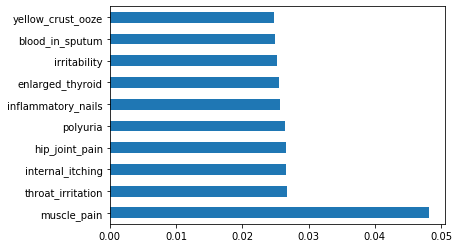

In [88]:
feat_importances = pd.Series(dt_model.feature_importances_, index=features)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Thus the top features are the symptoms of runny_nose, internal_itching etc that would play a bigger role in predicting diseases. This can be verified by the exported decision tree.

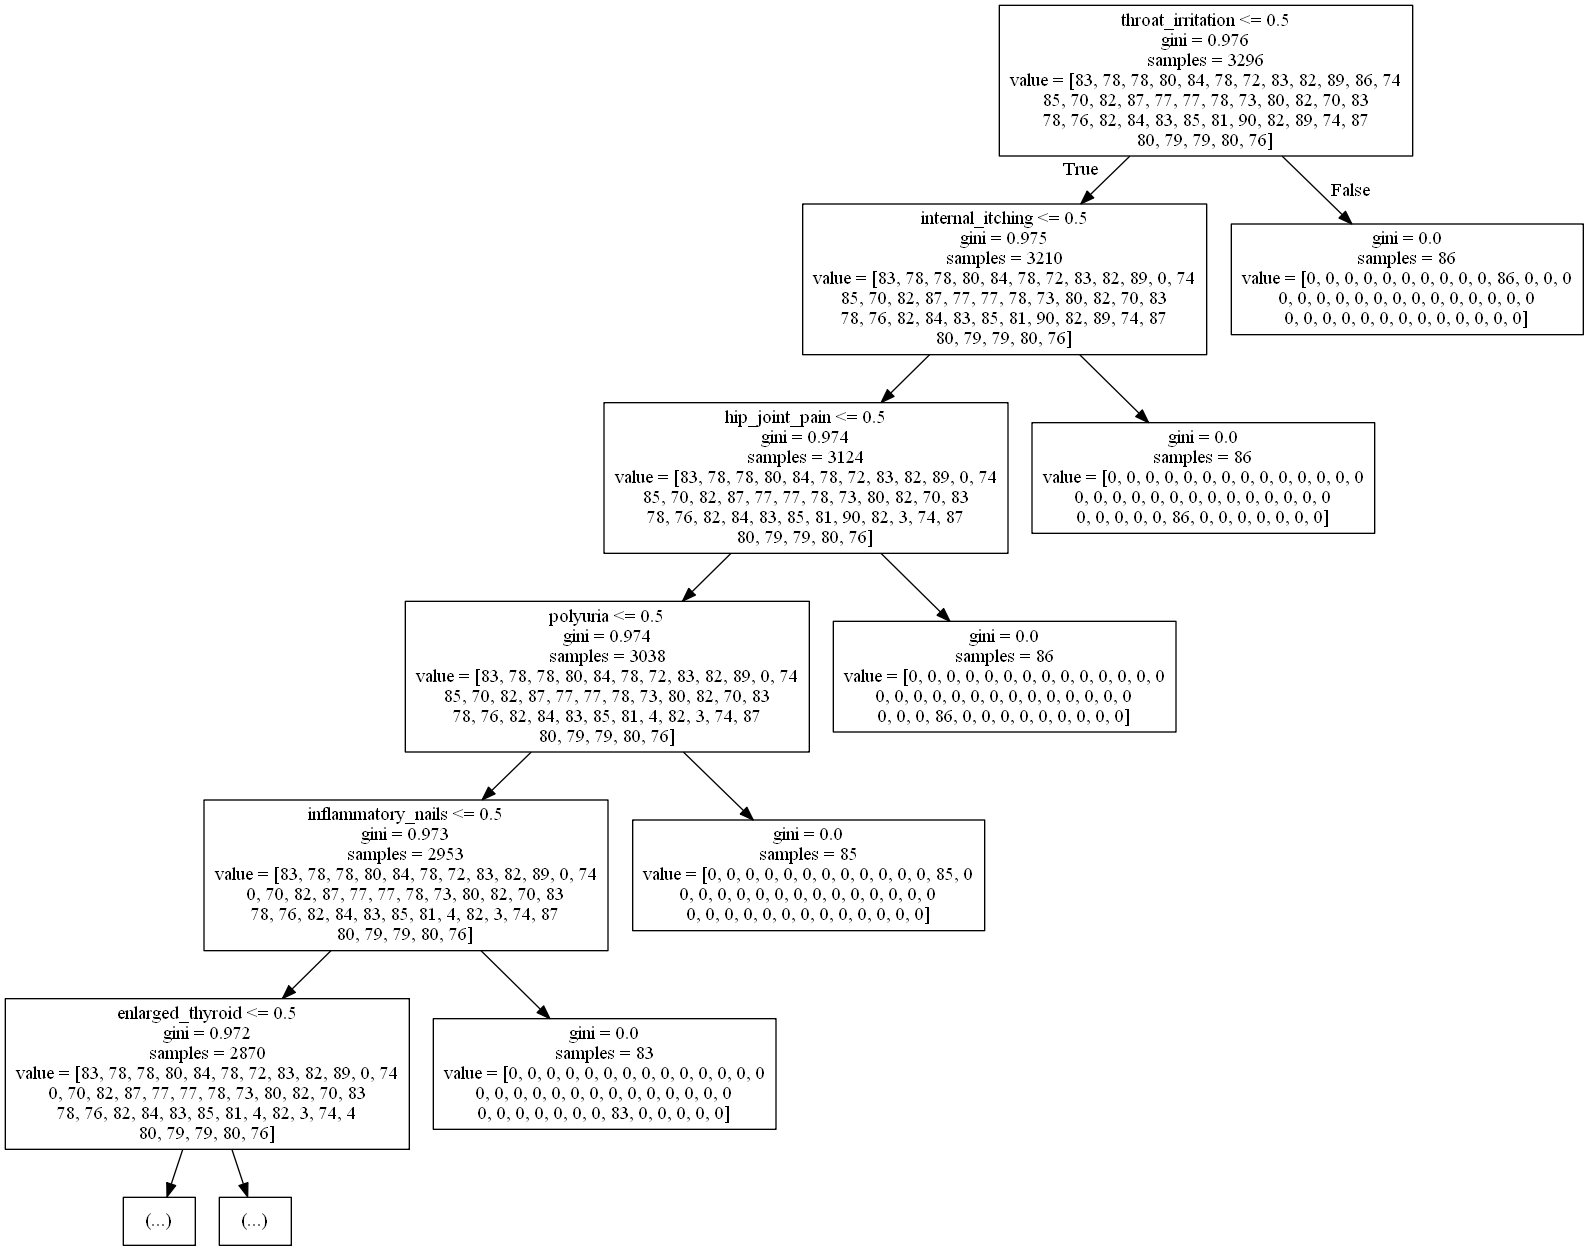

In [89]:
# Create DOT data
dot_data = export_graphviz(dt_model, out_file=None, feature_names=features, max_depth=5)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

But increased   runny_nose is the top symptom that has the highest Gini impurity score of 0.976. Then comes internal_itchiness with a score of 0.975 and so on. Basically this implies that the running_nose symptom has the potential to divide most samples into particular classes and hence is selected as the root of the decision tree. From there we move down with decreasing order of Gini scores.

In [90]:
feature_dict = {}
for i, f in enumerate(features):
    feature_dict[f] = i

In [91]:
print(feature_dict)

{'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and

In [92]:
symtom_set = ['runny_nose', 'shivering', 'chills', 'joint_pain' ]

In [93]:
import joblib

In [94]:
# Save to file in the current working directory
joblib_file = "SH-data-analysis-model.pkl"
joblib.dump(dt_model, joblib_file)

['SH-data-analysis-model.pkl']

In [95]:
# Load from file
jm = joblib.load(joblib_file)


In [96]:
def predict_disease(symptoms_lst):
    sym_num = []
    sample = []
    for i in symptoms_lst:
        sym_num.append(feature_dict[i])
            
    for i in sym_num:
        arr = [j/i if j == i else j*0 for j in range(len(features))]
        sample.append(arr)
    sample = np.array(sample)
    disease = jm.predict(sample) 
    return disease
    
    

In [97]:
predict_disease(symtom_set)

array(['Cervical spondylosis', 'Allergy', 'Typhoid', 'Psoriasis'],
      dtype=object)

In [98]:
predict_disease(['runny_nose'])

array(['Cervical spondylosis'], dtype=object)

In [99]:
predict_disease(['chills', 'runny_nose', 'high_fever'])

array(['Typhoid', 'Cervical spondylosis', 'Impetigo'], dtype=object)